In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler


In [37]:
#Load dataset
data = pd.read_csv('customer_data_records.csv')
print(data)

     CustomerID  Annual Income (k$)  Spending Score (1-100)
0             1                 117                      20
1             2                 107                      59
2             3                  29                      36
3             4                 121                      19
4             5                  86                      90
..          ...                 ...                     ...
169         170                 111                      76
170         171                 138                      87
171         172                  84                      15
172         173                 107                      92
173         174                  17                      98

[174 rows x 3 columns]


In [38]:
#Extract relevant features for clustering
X = data.iloc[:, [1, 2,]].values  # Select columns 1 and 2 as 'Annual Income' and 'Spending Score' for all rows

In [39]:
# Feature scaling - it is important to scale the features before clustering
scaler = StandardScaler() # Create a StandardScaler object
X_scaled = scaler.fit_transform(X)  # Standardize the features to have mean=0 and variance=1

In [40]:
# Determine the optimal number of clusters using the Elbow method
wcss = []  # List to store the within-cluster sum of squares
for i in range(1, 11):  # Testing for 1 to 10 clusters
    kmeans = cluster.KMeans(n_clusters=i, random_state=42)  
    kmeans.fit(X_scaled)  # Fit the model to the scaled data
    wcss.append(kmeans.inertia_)  # Append the inertia (WCSS) to the list

c:\Users\ASHLEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASHLEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASHLEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASHLEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

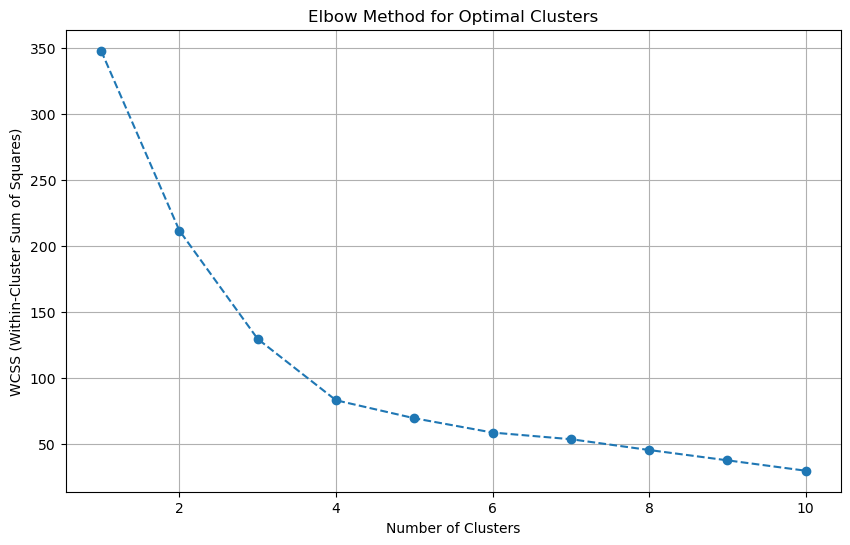

In [41]:
# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [42]:

optimal_clusters = 5  # i,e say we determined 5 clusters from the Elbow method

kmeans = cluster.KMeans(n_clusters=optimal_clusters, random_state=42) 
kmeans.fit(X_scaled)

c:\Users\ASHLEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [43]:
# Apply the K-means with the optimal number of clusters
kmeans = cluster.KMeans(n_clusters=optimal_clusters, random_state=42)  
y_kmeans = kmeans.fit_predict(X_scaled)  


c:\Users\ASHLEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [44]:
# Add cluster labels to the original data
data['Cluster'] = y_kmeans

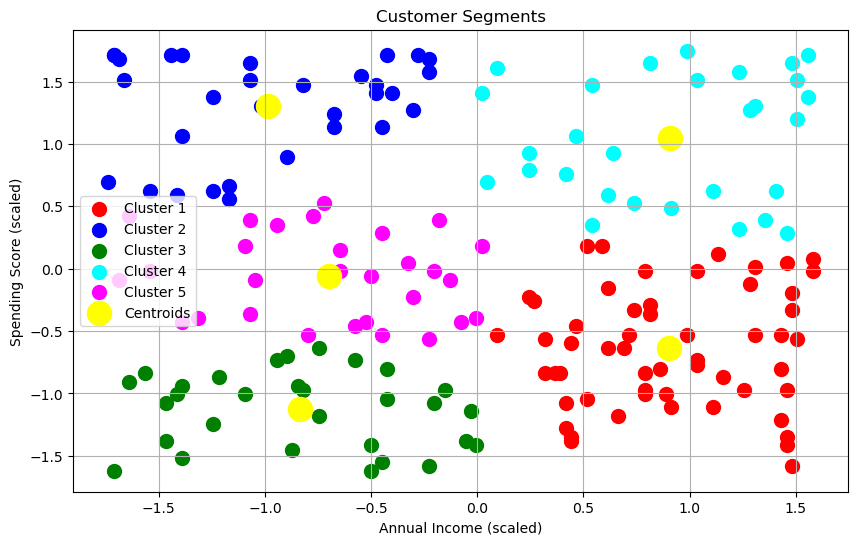

In [46]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()